## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append("../")

In [120]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,10.)})
sns.set_style("whitegrid")

## 2. Import Data

In [57]:
original = pd.read_csv("../Data/clean_PCA_user.csv")

In [58]:
df = original.copy()

In [59]:
df.head()

,Unnamed: 0,Gun_related_deaths,Pisa_ranking,Cities,Homosexuality_acceptance,VAT_Sales_Tax,Sport_venues,GDP_per_capita,Growth_percentage,Unemployment_percentage,Average_Annual_percent_sunshine,Housing,Culture,Travel_connectivity
0,0,1,13,Aarhus,93.03,0.25,21,44342.66,0.05,0.04,0.0,1280,164,0.355
1,1,1,16,Adelaide,79.00,0.10,91,46433.30,0.07,0.06,12.6,1233,208,0.180
2,2,16,24,Albuquerque,93.13,0.07,10,54596.65,0.07,0.05,168.0,970,261,0.145
3,3,1,39,Almaty,66.56,0.12,53,24019.95,0.09,0.06,64.0,480,153,0.460
4,4,1,10,Amsterdam,97.37,0.21,154,47354.53,0.03,0.06,12.9,2000,810,0.830


In [169]:
df.Gun_related_deaths.unique()

array([ 1, 16, 20,  2, 12,  8, 13, 11,  0, 10,  3, 26, 14, 17,  6,  4, 33,
       59,  9, 21, 34, 15, 31,  5, 25, 19, 46])

In [60]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [61]:
i = df.Cities

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gun_related_deaths               262 non-null    int64  
 1   Pisa_ranking                     262 non-null    int64  
 2   Cities                           262 non-null    object 
 3   Homosexuality_acceptance         262 non-null    float64
 4   VAT_Sales_Tax                    262 non-null    float64
 5   Sport_venues                     262 non-null    int64  
 6   GDP_per_capita                   262 non-null    float64
 7   Growth_percentage                262 non-null    float64
 8   Unemployment_percentage          262 non-null    float64
 9   Average_Annual_percent_sunshine  262 non-null    float64
 10  Housing                          262 non-null    int64  
 11  Culture                          262 non-null    int64  
 12  Travel_connectivity   

In [63]:
df.columns

Index(['Gun_related_deaths', 'Pisa_ranking', 'Cities',
       'Homosexuality_acceptance', 'VAT_Sales_Tax', 'Sport_venues',
       'GDP_per_capita', 'Growth_percentage', 'Unemployment_percentage',
       'Average_Annual_percent_sunshine', 'Housing', 'Culture',
       'Travel_connectivity'],
      dtype='object')

In [54]:
#sns.pairplot(df, hue="cities")

In [64]:
pca = PCA(2)

In [66]:
df2 = pd.DataFrame(pca.fit_transform(df.drop(columns="Cities")), columns=["PC1","PC2"])

In [67]:
df2.head()

,PC1,PC2
0,8079.610247,4.243983
1,10169.055275,-72.017553
2,18326.013216,-484.545381
3,-12254.671746,-391.962756
4,11106.103122,767.435848


In [69]:
completo = df2.copy()
completo["Cities"] = df["Cities"]

In [70]:
completo.head()

,PC1,PC2,Cities
0,8079.610247,4.243983,Aarhus
1,10169.055275,-72.017553,Adelaide
2,18326.013216,-484.545381,Albuquerque
3,-12254.671746,-391.962756,Almaty
4,11106.103122,767.435848,Amsterdam


/usr/local/Caskroom/miniconda/base/envs/ironhack2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


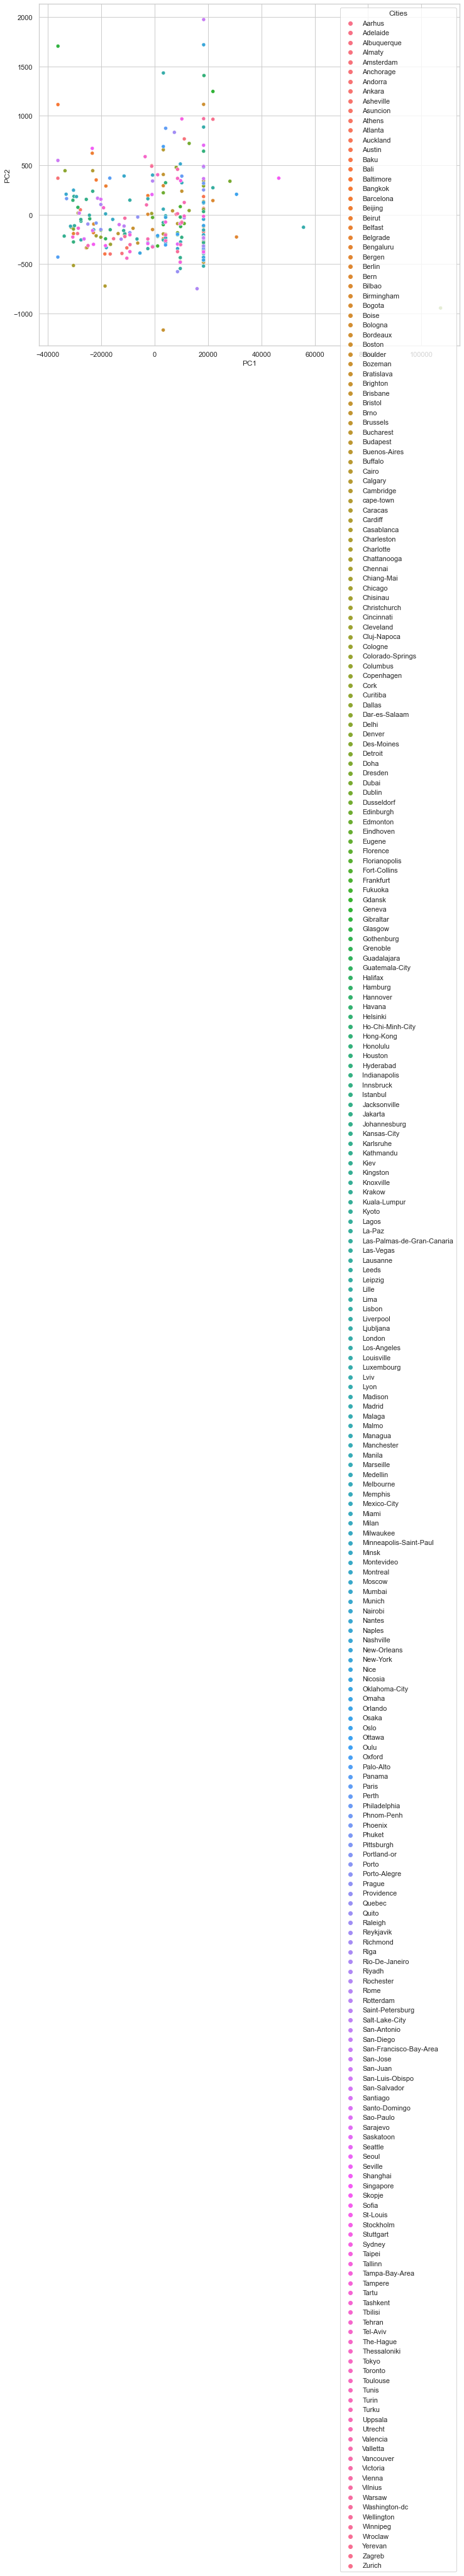

In [72]:
pca_country = sns.scatterplot(df2["PC1"],df2["PC2"], hue=df["Cities"]);

In [74]:
dat_ = df.copy()
dat_.drop(columns="Cities", inplace=True)
dat_.head()

,Gun_related_deaths,Pisa_ranking,Homosexuality_acceptance,VAT_Sales_Tax,Sport_venues,GDP_per_capita,Growth_percentage,Unemployment_percentage,Average_Annual_percent_sunshine,Housing,Culture,Travel_connectivity
0,1,13,93.03,0.25,21,44342.66,0.05,0.04,0.0,1280,164,0.355
1,1,16,79.00,0.10,91,46433.30,0.07,0.06,12.6,1233,208,0.180
2,16,24,93.13,0.07,10,54596.65,0.07,0.05,168.0,970,261,0.145
3,1,39,66.56,0.12,53,24019.95,0.09,0.06,64.0,480,153,0.460
4,1,10,97.37,0.21,154,47354.53,0.03,0.06,12.9,2000,810,0.830


In [75]:
scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(dat_), columns=dat_.columns)
df_scaler.head()

,Gun_related_deaths,Pisa_ranking,Homosexuality_acceptance,VAT_Sales_Tax,Sport_venues,GDP_per_capita,Growth_percentage,Unemployment_percentage,Average_Annual_percent_sunshine,Housing,Culture,Travel_connectivity
0,-0.608695,-0.325474,0.990893,1.327470,-0.777508,0.418905,-0.036009,-0.586892,-0.969582,0.330595,-0.629116,0.046962
1,-0.608695,-0.102438,0.392317,-0.489019,0.282599,0.527322,0.121231,-0.254426,-0.844737,0.247164,-0.415778,-0.784392
2,1.053689,0.492326,0.995159,-0.852317,-0.944096,0.950660,0.121231,-0.420659,0.695016,-0.219697,-0.158801,-0.950662
3,-0.608695,1.607507,-0.138424,-0.246821,-0.292888,-0.634997,0.278472,-0.254426,-0.335450,-1.089513,-0.682451,0.545774
4,-0.608695,-0.548510,1.176055,0.843073,1.236695,0.575096,-0.193250,-0.254426,-0.841765,1.608693,2.503086,2.303493


## We performed the elbow method to determine the number of clusters to use

In [76]:
kmeans = [KMeans(n_clusters=i) for i in range(1,31)]
for model in kmeans:
    model.fit(df2)

In [77]:
inertias = [model.inertia_ for model in kmeans]
inertias[:8]

[97508224667.00989,
 28962700541.734535,
 18215747619.30986,
 10107962074.074322,
 6345704808.045895,
 4512024232.303897,
 2731532931.368161,
 1667894193.544541]

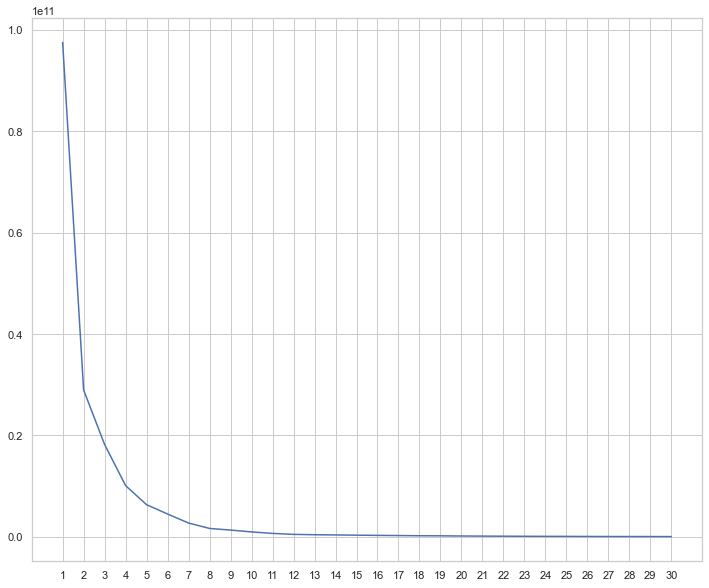

In [78]:
plt.plot(range(1,31),inertias)
plt.xticks(range(1,31));

## We train the algorithm

In [79]:
km = KMeans(n_clusters=3)
km.fit(df2)

KMeans(n_clusters=3)

In [80]:
y_pred = km.predict(df2)

In [81]:
df2["predict"] = y_pred

In [83]:
df2["real"] = original["Cities"]

In [84]:
df2

,PC1,PC2,predict,real
0,8079.610247,4.243983,1,Aarhus
1,10169.055275,-72.017553,1,Adelaide
2,18326.013216,-484.545381,2,Albuquerque
3,-12254.671746,-391.962756,0,Almaty
4,11106.103122,767.435848,1,Amsterdam
...,...,...,...,...
257,8573.126905,-373.413350,1,Winnipeg
258,-11165.644332,-220.708417,0,Wroclaw
259,-28900.224749,-190.771802,0,Yerevan
260,-15383.583285,-242.915931,0,Zagreb


In [85]:
crosstab = pd.crosstab(df2.predict, df2.real)

In [86]:
crosstab

real,Aarhus,Adelaide,Albuquerque,Almaty,Amsterdam,Anchorage,Andorra,Ankara,Asheville,Asuncion,...,Vilnius,Warsaw,Washington-dc,Wellington,Winnipeg,Wroclaw,Yerevan,Zagreb,Zurich,cape-town
predict,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,1,1,0,1,...,1,1,0,0,0,1,1,1,0,1
1,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


## We inspect the existing correlation with our precondition

In [87]:
df['predict'] = y_pred

In [88]:
corr = df.corr()
corr

,Gun_related_deaths,Pisa_ranking,Homosexuality_acceptance,VAT_Sales_Tax,Sport_venues,GDP_per_capita,Growth_percentage,Unemployment_percentage,Average_Annual_percent_sunshine,Housing,Culture,Travel_connectivity,predict
Gun_related_deaths,1.000000,0.049916,-0.245446,-0.089742,0.043274,-0.136248,0.278718,0.161837,0.074162,-0.133402,0.103622,-0.347059,-0.014758
Pisa_ranking,0.049916,1.000000,0.020741,0.214125,0.315735,0.125836,-0.087014,-0.074130,0.056095,0.026375,0.276668,-0.069452,0.052223
Homosexuality_acceptance,-0.245446,0.020741,1.000000,0.096908,-0.130964,0.398465,-0.074228,-0.150175,0.101782,0.377162,-0.063740,0.096440,0.414634
VAT_Sales_Tax,-0.089742,0.214125,0.096908,1.000000,0.042025,-0.250317,-0.154099,0.334131,-0.048260,-0.237542,-0.095919,0.257617,-0.400261
Sport_venues,0.043274,0.315735,-0.130964,0.042025,1.000000,0.057545,-0.058246,-0.035862,-0.088237,0.224569,0.831198,0.291326,0.045504
GDP_per_capita,-0.136248,0.125836,0.398465,-0.250317,0.057545,1.000000,-0.197316,-0.339082,0.141033,0.659346,0.184979,0.194374,0.892428
Growth_percentage,0.278718,-0.087014,-0.074228,-0.154099,-0.058246,-0.197316,1.000000,0.045709,0.010414,-0.082013,-0.044663,-0.084540,-0.105444
Unemployment_percentage,0.161837,-0.074130,-0.150175,0.334131,-0.035862,-0.339082,0.045709,1.000000,0.006402,-0.342732,-0.138455,-0.099138,-0.330293
Average_Annual_percent_sunshine,0.074162,0.056095,0.101782,-0.048260,-0.088237,0.141033,0.010414,0.006402,1.000000,0.083809,0.001592,-0.150975,0.166169
Housing,-0.133402,0.026375,0.377162,-0.237542,0.224569,0.659346,-0.082013,-0.342732,0.083809,1.000000,0.320892,0.311632,0.650946


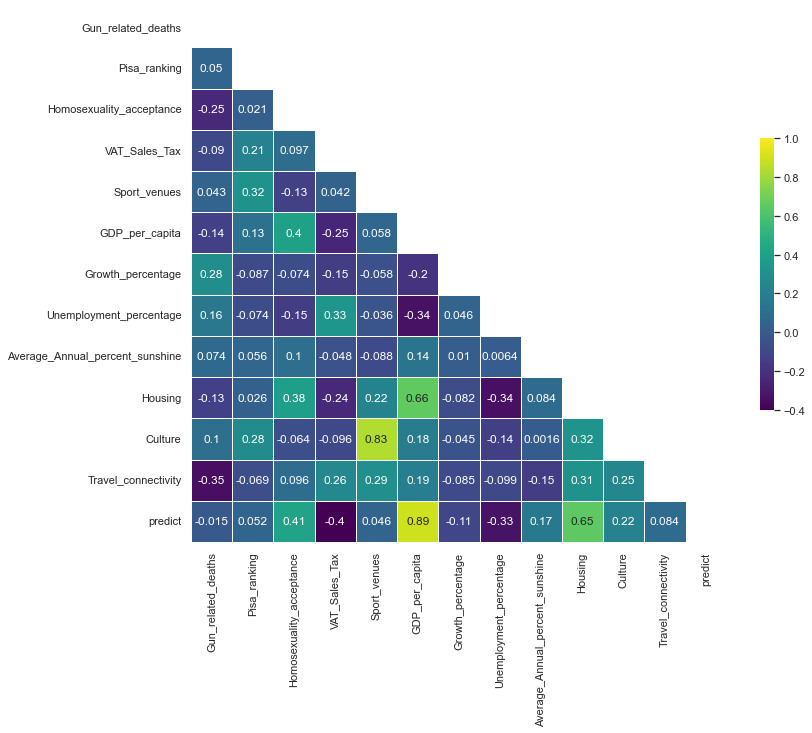

In [89]:
mascara5 = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr,
            mask = mascara5,
            cmap='viridis',
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5}, #barra lateral,
            annot=True
);

### We can see that there is no strong correlation between the variables.

In [90]:
#Sacamos K-means con todos los predictores

In [91]:
km2  = KMeans(n_clusters=3)
km2.fit(df_scaler)

KMeans(n_clusters=3)

In [92]:
y_cuatro = km2.predict(df_scaler)

In [94]:
df_scaler["real"] = original.Cities
df_scaler["kmeans"] = y_cuatro

In [95]:
df_scaler.head()

,Gun_related_deaths,Pisa_ranking,Homosexuality_acceptance,VAT_Sales_Tax,Sport_venues,GDP_per_capita,Growth_percentage,Unemployment_percentage,Average_Annual_percent_sunshine,Housing,Culture,Travel_connectivity,real,kmeans
0,-0.608695,-0.325474,0.990893,1.327470,-0.777508,0.418905,-0.036009,-0.586892,-0.969582,0.330595,-0.629116,0.046962,Aarhus,0
1,-0.608695,-0.102438,0.392317,-0.489019,0.282599,0.527322,0.121231,-0.254426,-0.844737,0.247164,-0.415778,-0.784392,Adelaide,0
2,1.053689,0.492326,0.995159,-0.852317,-0.944096,0.950660,0.121231,-0.420659,0.695016,-0.219697,-0.158801,-0.950662,Albuquerque,0
3,-0.608695,1.607507,-0.138424,-0.246821,-0.292888,-0.634997,0.278472,-0.254426,-0.335450,-1.089513,-0.682451,0.545774,Almaty,2
4,-0.608695,-0.548510,1.176055,0.843073,1.236695,0.575096,-0.193250,-0.254426,-0.841765,1.608693,2.503086,2.303493,Amsterdam,1


In [97]:
cross2 = pd.crosstab(df_scaler.kmeans, df_scaler.real)
cross2

real,Aarhus,Adelaide,Albuquerque,Almaty,Amsterdam,Anchorage,Andorra,Ankara,Asheville,Asuncion,...,Vilnius,Warsaw,Washington-dc,Wellington,Winnipeg,Wroclaw,Yerevan,Zagreb,Zurich,cape-town
kmeans,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,1,0,1,...,1,1,0,0,0,1,1,1,0,1


/usr/local/Caskroom/miniconda/base/envs/ironhack2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/Caskroom/miniconda/base/envs/ironhack2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


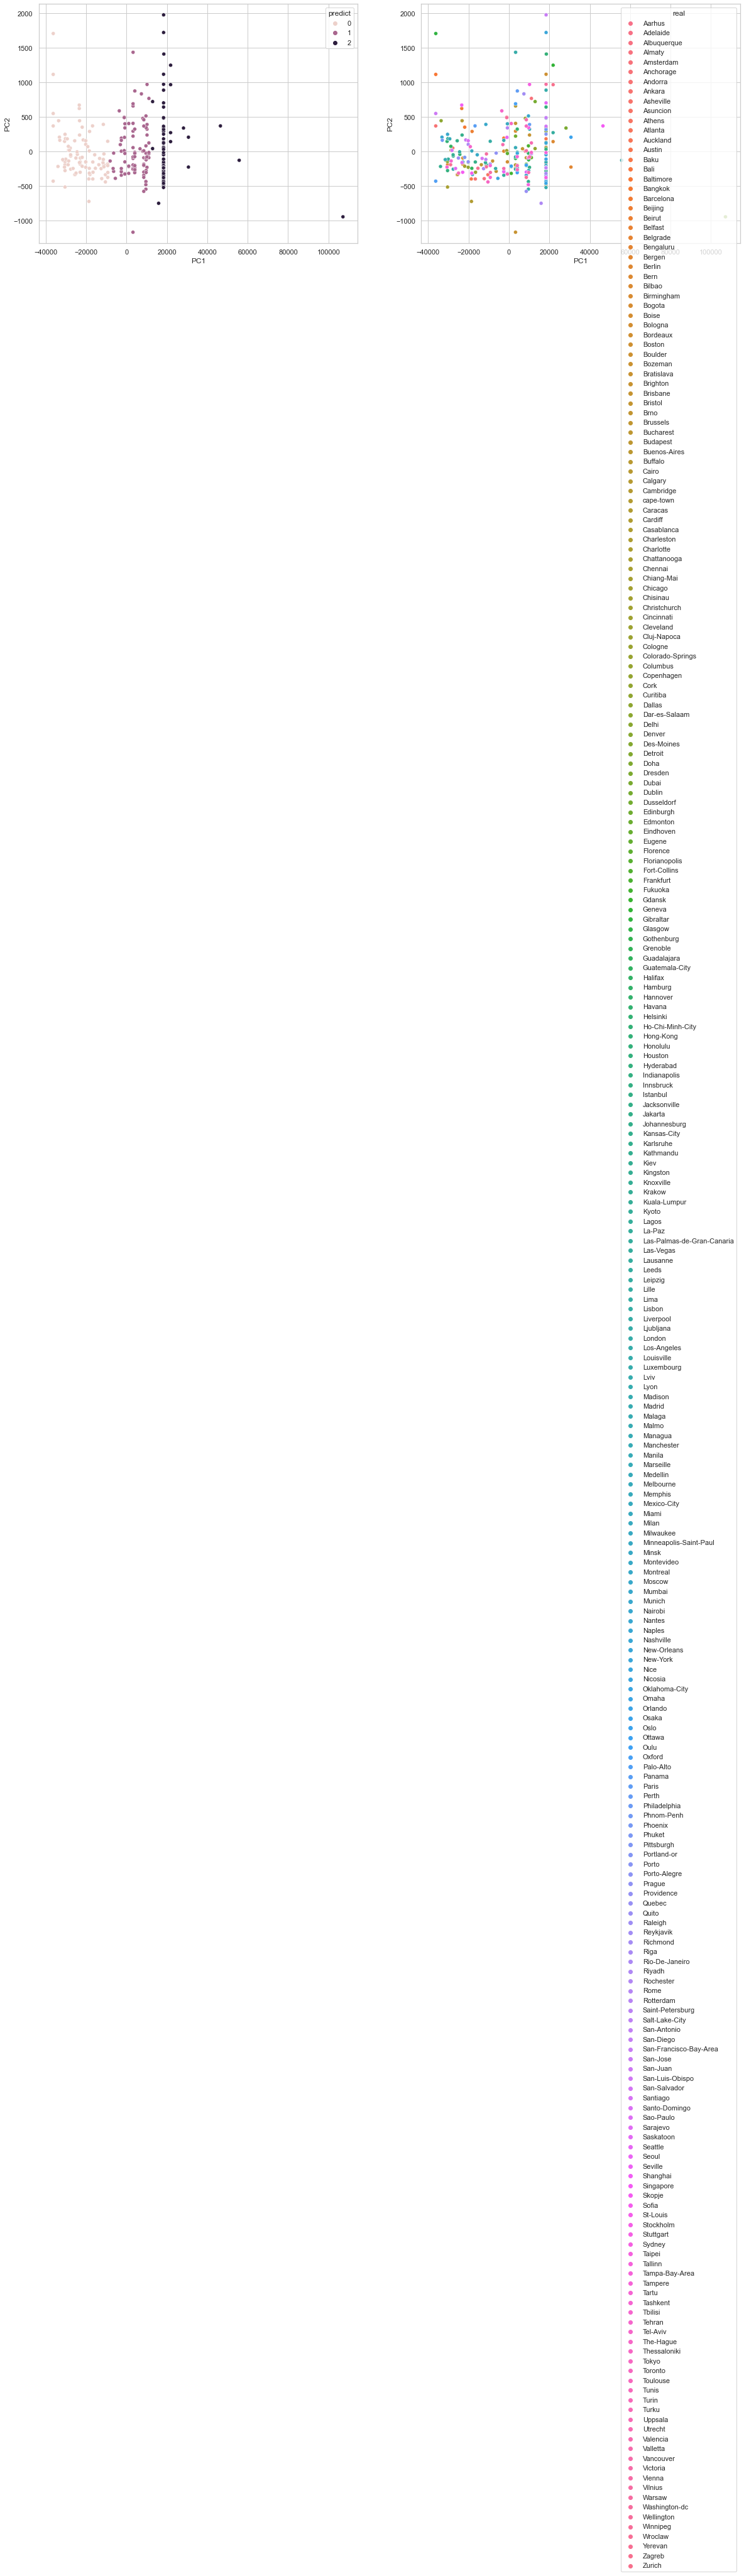

In [96]:
fig, axs = plt.subplots(1,2, figsize=(20,7))
pca_ = sns.scatterplot(df2["PC1"],df2["PC2"], hue=df2["predict"], ax=axs[0]);
pca_ = sns.scatterplot(df2["PC1"],df2["PC2"], hue=df2["real"], ax=axs[1]);

In [124]:
df_silueta = df2.drop(columns=["predict","real"])


In [125]:
silhouette_score(df_silueta, y_pred)

0.6315326172229135

## Observemos con profundidad cada una de nuestras columnas, en relación a cada cluster

In [128]:
df.head()

,Gun_related_deaths,Pisa_ranking,Cities,Homosexuality_acceptance,VAT_Sales_Tax,Sport_venues,GDP_per_capita,Growth_percentage,Unemployment_percentage,Average_Annual_percent_sunshine,Housing,Culture,Travel_connectivity,predict
0,1,13,Aarhus,93.03,0.25,21,44342.66,0.05,0.04,0.0,1280,164,0.355,1
1,1,16,Adelaide,79.00,0.10,91,46433.30,0.07,0.06,12.6,1233,208,0.180,1
2,16,24,Albuquerque,93.13,0.07,10,54596.65,0.07,0.05,168.0,970,261,0.145,2
3,1,39,Almaty,66.56,0.12,53,24019.95,0.09,0.06,64.0,480,153,0.460,0
4,1,10,Amsterdam,97.37,0.21,154,47354.53,0.03,0.06,12.9,2000,810,0.830,1


### Gun_related_deaths

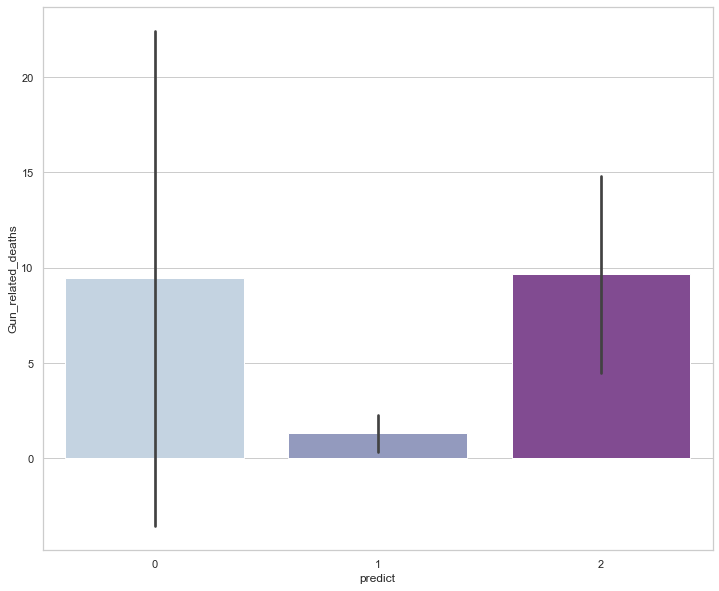

In [168]:
barplot = sns.barplot(x="predict", y="Gun_related_deaths", data=df,palette ="BuPu",ci="sd")

### Pisa_ranking

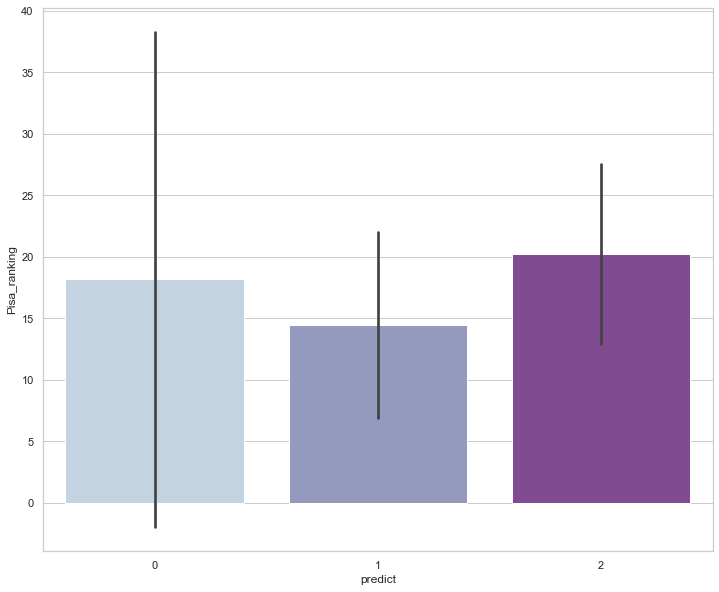

In [167]:
barplot = sns.barplot(x="predict", y="Pisa_ranking", data=df,palette ="BuPu",ci="sd")

### Homosexuality_acceptance

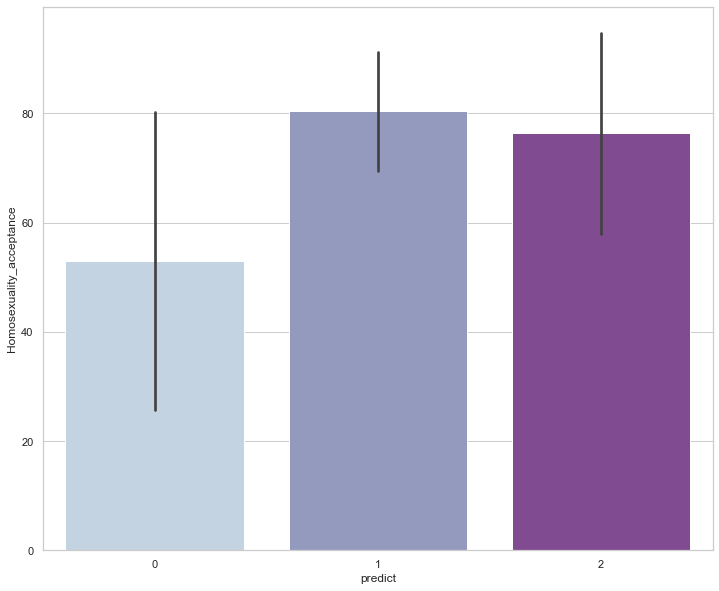

In [166]:
barplot = sns.barplot(x="predict", y="Homosexuality_acceptance", data=df,palette ="BuPu",ci="sd")

###  VAT_Sales_Tax

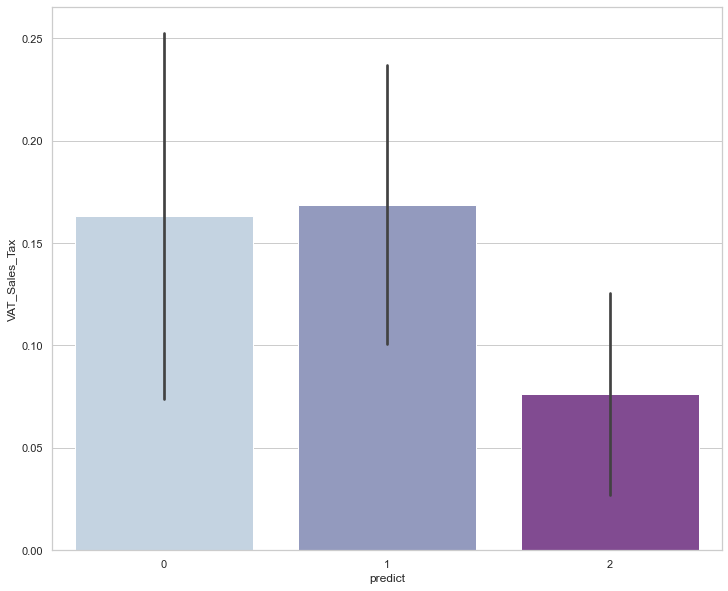

In [165]:
barplot = sns.barplot(x="predict", y="VAT_Sales_Tax", data=df,palette ="BuPu",ci="sd")

### Sport_venues

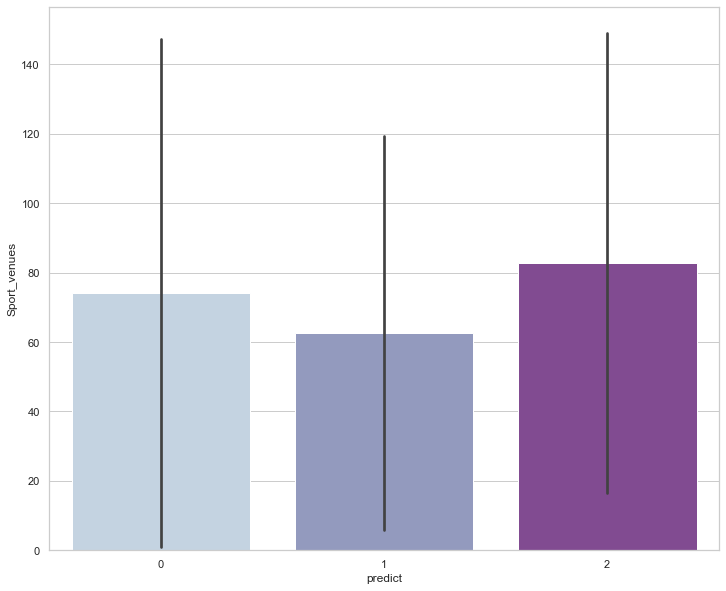

In [164]:
barplot = sns.barplot(x="predict", y="Sport_venues", data=df,palette ="BuPu",ci="sd")

### GDP_per_capita

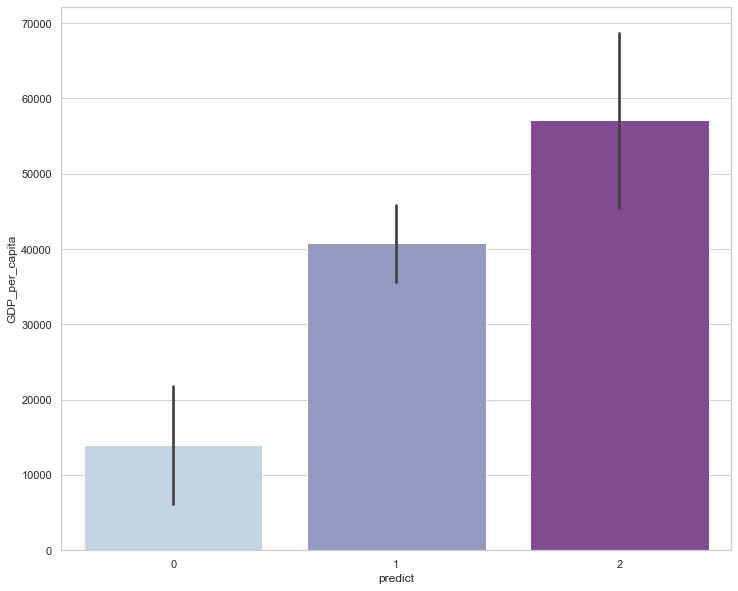

In [163]:
barplot = sns.barplot(x="predict", y="GDP_per_capita", data=df,palette ="BuPu",ci="sd")

### Growth_percentage

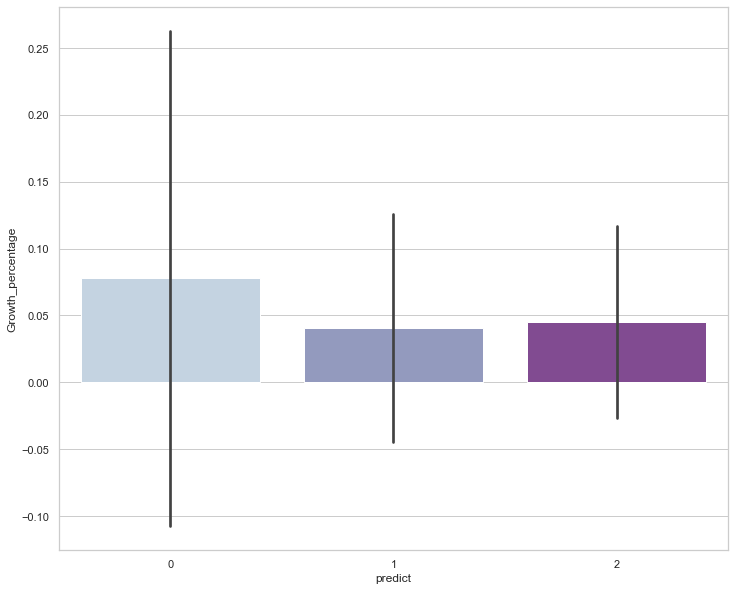

In [162]:
barplot = sns.barplot(x="predict", y="Growth_percentage", data=df,palette ="BuPu",ci="sd")

### Unemployment_percentage

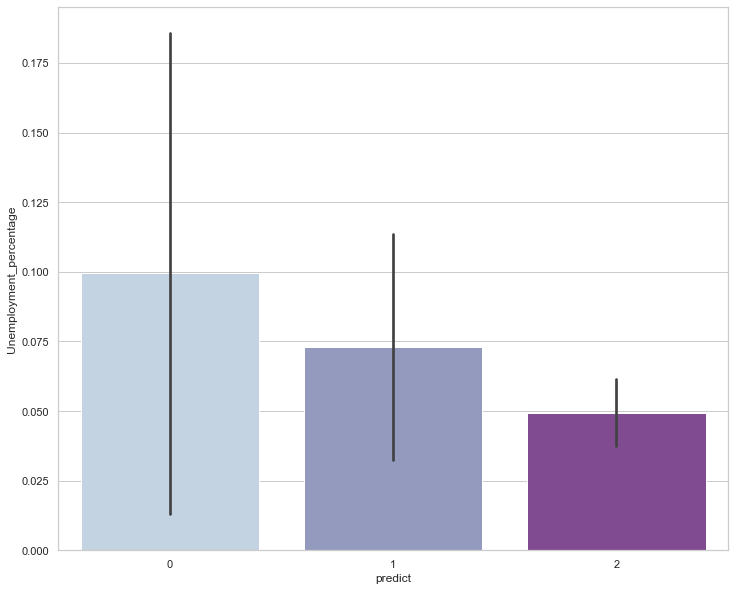

In [161]:
barplot = sns.barplot(x="predict", y="Unemployment_percentage", data=df,palette ="BuPu",ci="sd")

### Average_Annual_percent_sunshine

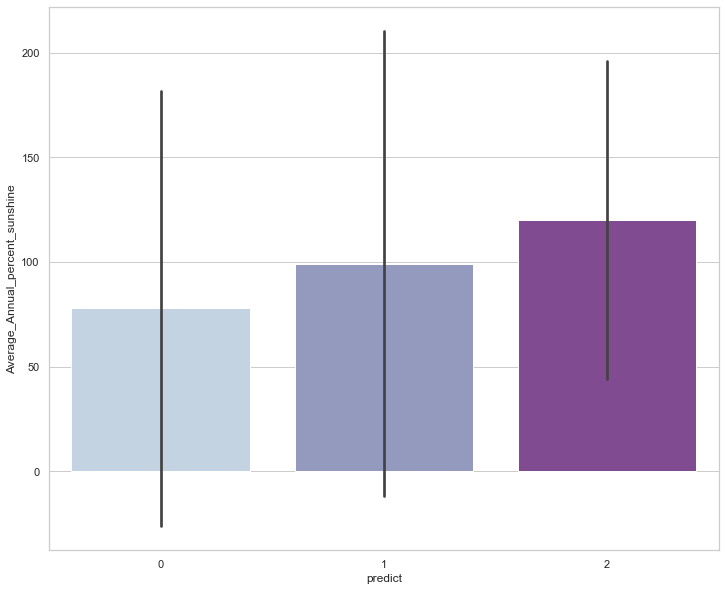

In [160]:
barplot = sns.barplot(x="predict", y="Average_Annual_percent_sunshine", data=df,palette ="BuPu",ci="sd")

### Housing

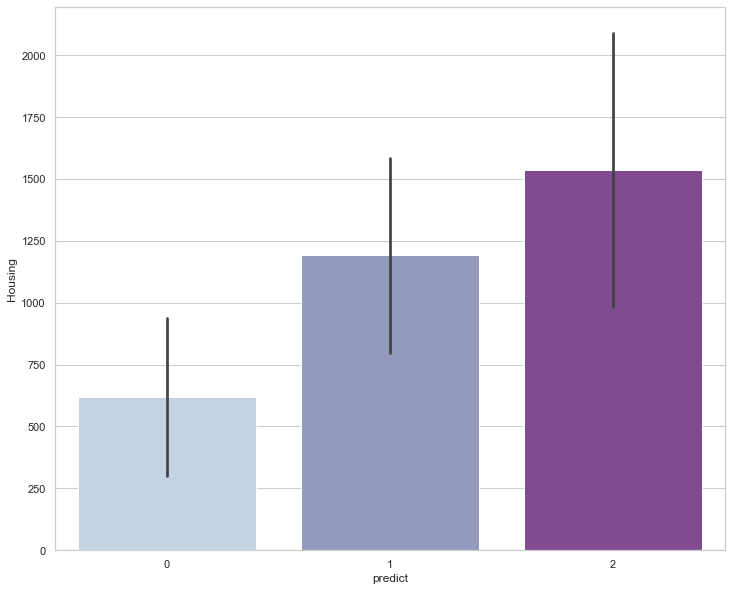

In [159]:
barplot = sns.barplot(x="predict", y="Housing", data=df,palette ="BuPu",ci="sd")

### Culture

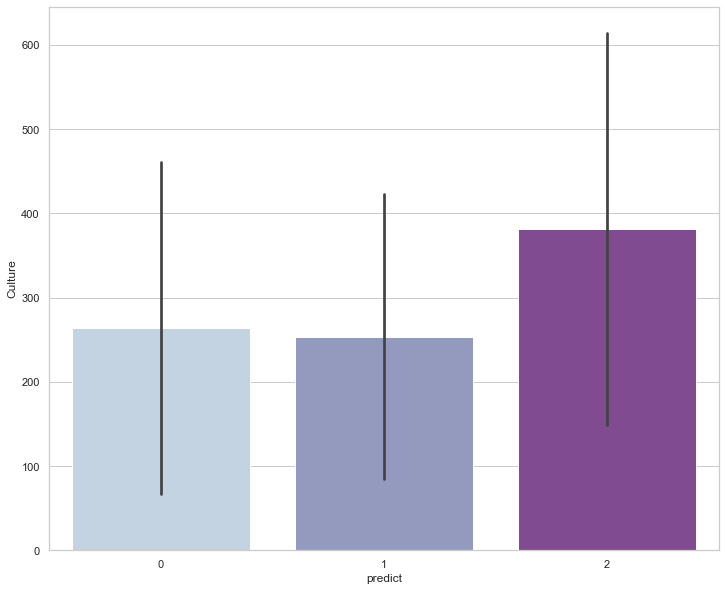

In [158]:
barplot = sns.barplot(x="predict", y="Culture", data=df,palette ="BuPu",ci="sd")

### Travel_connectivity

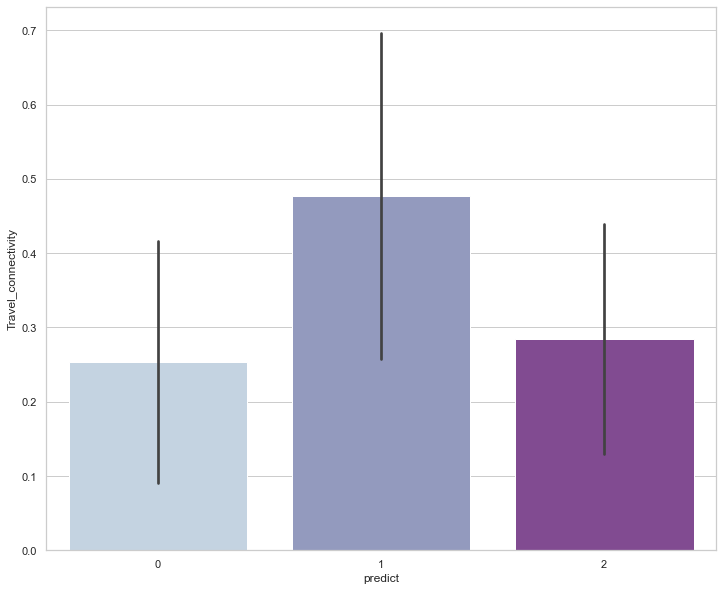

In [157]:
barplot = sns.barplot(x="predict", y="Travel_connectivity", data=df,palette ="BuPu",ci="sd")

### Creamos subdatadrames para ver cada uno de nuestros clusters por separado

In [141]:
subdata0 = df[df["predict"] == 0]

In [144]:
Cluster0 = subdata0.Cities.unique()

In [145]:
Cluster0

array(['Almaty', 'Andorra', 'Ankara', 'Asuncion', 'Athens', 'Baku',
       'Bali', 'Baltimore', 'Bangkok', 'Beijing', 'Beirut', 'Belgrade',
       'Bengaluru', 'Bogota', 'Bucharest', 'Budapest', 'Buenos-Aires',
       'Cairo', 'cape-town', 'Caracas', 'Casablanca', 'Chennai',
       'Chiang-Mai', 'Chisinau', 'Cluj-Napoca', 'Curitiba',
       'Dar-es-Salaam', 'Delhi', 'Florianopolis', 'Gdansk', 'Gibraltar',
       'Guadalajara', 'Guatemala-City', 'Havana', 'Ho-Chi-Minh-City',
       'Hyderabad', 'Istanbul', 'Jakarta', 'Johannesburg', 'Kathmandu',
       'Kiev', 'Kingston', 'Krakow', 'Kuala-Lumpur', 'Lagos', 'La-Paz',
       'Lima', 'Lisbon', 'Lviv', 'Managua', 'Manila', 'Medellin',
       'Mexico-City', 'Minsk', 'Montevideo', 'Moscow', 'Mumbai',
       'Nairobi', 'Palo-Alto', 'Panama', 'Phnom-Penh', 'Phuket', 'Porto',
       'Porto-Alegre', 'Quito', 'Riga', 'Rio-De-Janeiro',
       'Saint-Petersburg', 'San-Jose', 'San-Juan', 'San-Salvador',
       'Santiago', 'Santo-Domingo', 'Sao-Paulo'

In [151]:
subdata1 = df[df["predict"] == 1]

In [152]:
Cluster1 = subdata1.Cities.unique()

In [153]:
Cluster1

array(['Aarhus', 'Adelaide', 'Amsterdam', 'Auckland', 'Barcelona',
       'Belfast', 'Berlin', 'Bilbao', 'Birmingham', 'Bologna', 'Bordeaux',
       'Bratislava', 'Brighton', 'Brisbane', 'Bristol', 'Brno',
       'Brussels', 'Calgary', 'Cambridge', 'Cardiff', 'Christchurch',
       'Cologne', 'Copenhagen', 'Dresden', 'Dusseldorf', 'Edinburgh',
       'Edmonton', 'Eindhoven', 'Florence', 'Frankfurt', 'Fukuoka',
       'Glasgow', 'Gothenburg', 'Grenoble', 'Halifax', 'Hamburg',
       'Hannover', 'Helsinki', 'Innsbruck', 'Karlsruhe', 'Kyoto',
       'Las-Palmas-de-Gran-Canaria', 'Leeds', 'Leipzig', 'Lille',
       'Liverpool', 'Ljubljana', 'London', 'Lyon', 'Madrid', 'Malaga',
       'Malmo', 'Manchester', 'Marseille', 'Melbourne', 'Milan',
       'Montreal', 'Munich', 'Nantes', 'Naples', 'Nice', 'Nicosia',
       'Osaka', 'Ottawa', 'Oulu', 'Oxford', 'Paris', 'Perth', 'Prague',
       'Quebec', 'Reykjavik', 'Rome', 'Rotterdam', 'Saskatoon', 'Seoul',
       'Seville', 'Stockholm', 'Stuttga

In [154]:
subdata2 = df[df["predict"] == 2]

In [155]:
Cluster2 = subdata2.Cities.unique()

In [156]:
Cluster2

array(['Albuquerque', 'Anchorage', 'Asheville', 'Atlanta', 'Austin',
       'Bergen', 'Bern', 'Boise', 'Boston', 'Boulder', 'Bozeman',
       'Buffalo', 'Charleston', 'Charlotte', 'Chattanooga', 'Chicago',
       'Cincinnati', 'Cleveland', 'Colorado-Springs', 'Columbus', 'Cork',
       'Dallas', 'Denver', 'Des-Moines', 'Detroit', 'Doha', 'Dubai',
       'Dublin', 'Eugene', 'Fort-Collins', 'Geneva', 'Hong-Kong',
       'Honolulu', 'Houston', 'Indianapolis', 'Jacksonville',
       'Kansas-City', 'Knoxville', 'Las-Vegas', 'Lausanne', 'Los-Angeles',
       'Louisville', 'Luxembourg', 'Madison', 'Memphis', 'Miami',
       'Milwaukee', 'Minneapolis-Saint-Paul', 'Nashville', 'New-Orleans',
       'New-York', 'Oklahoma-City', 'Omaha', 'Orlando', 'Oslo',
       'Philadelphia', 'Phoenix', 'Pittsburgh', 'Portland-or',
       'Providence', 'Raleigh', 'Richmond', 'Riyadh', 'Rochester',
       'Salt-Lake-City', 'San-Antonio', 'San-Diego',
       'San-Francisco-Bay-Area', 'San-Luis-Obispo', 'Seattle'

El Cluster0 está caracterizado de manera notoria con: Unemployment - Growth_porcentaje - Housing bajo coste

El Cluster1 está caracterizado de manera notoria con: Safety - Travel_connectivity - Pisa_Ranking

El Cluster2 está caracterizado de manera notoria con: VTA bajo - Culture alto - GDP per capita alto

In [170]:
subdata0.to_csv("../Data/subdata0.csv")

In [171]:
subdata1.to_csv("../Data/subdata1.csv")

In [172]:
subdata2.to_csv("../Data/subdata2.csv")

### Observemos a continuación cada columna en los diversos clusters

## Housing

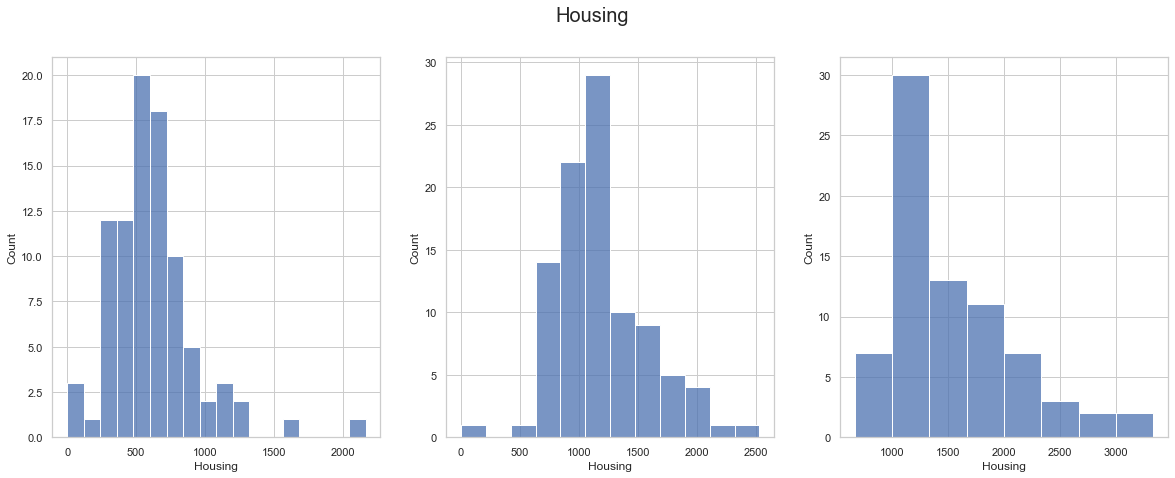

In [117]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
sns.histplot(data = subdata1, x='Housing', ax=axs[0])
sns.histplot(data = subdata2, x='Housing', ax=axs[1])
sns.histplot(data = subdata3, x='Housing', ax=axs[2])
fig.suptitle('Housing', fontsize = 20);

## Cost of Living

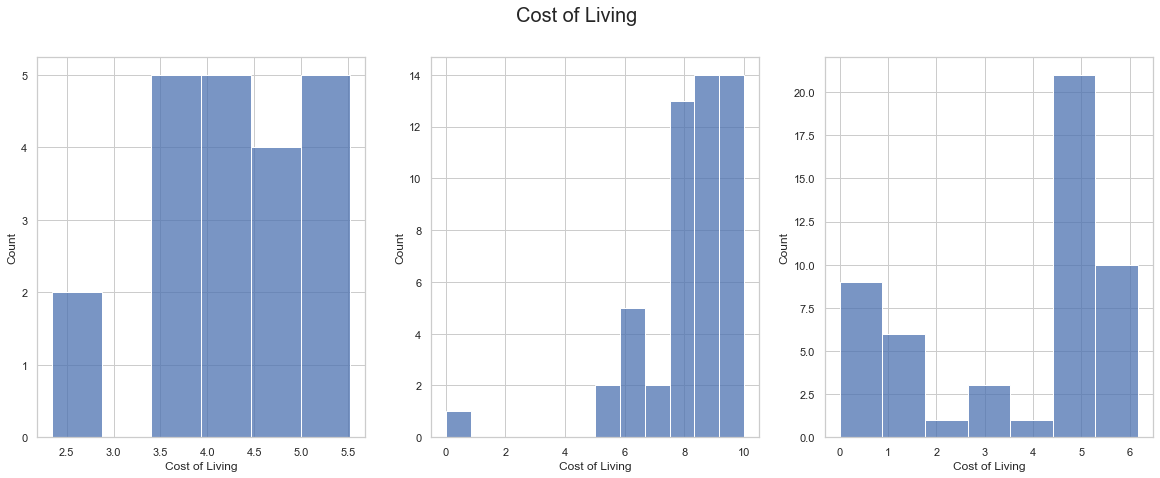

In [119]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
sns.histplot(data = subdata1, x='Cost of Living', ax=axs[0])
sns.histplot(data = subdata2, x='Cost of Living', ax=axs[1])
sns.histplot(data = subdata3, x='Cost of Living', ax=axs[2])
fig.suptitle('Cost of Living', fontsize = 20);

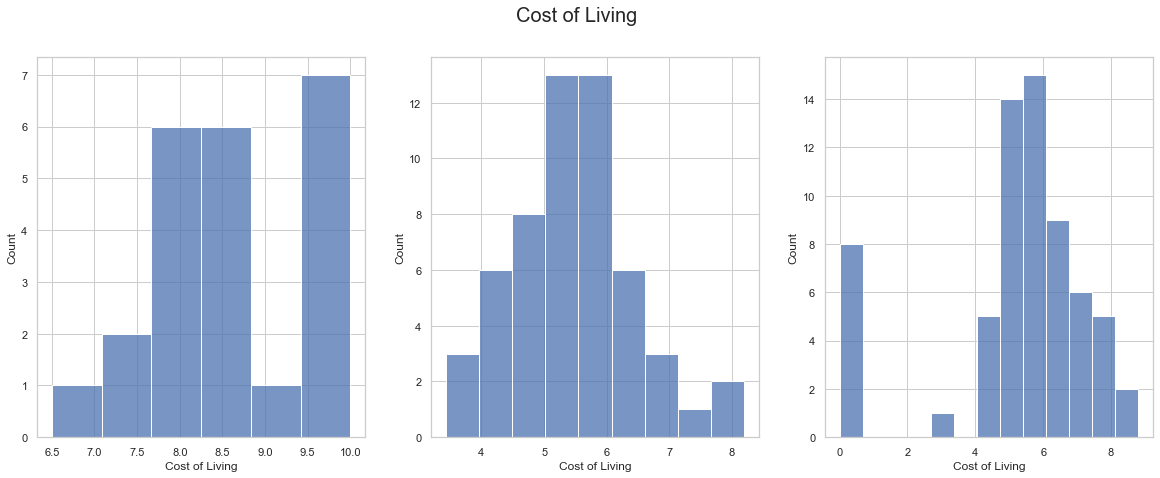

In [120]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
sns.histplot(data = subdata4, x='Cost of Living', ax=axs[0])
sns.histplot(data = subdata5, x='Cost of Living', ax=axs[1])
sns.histplot(data = subdata6, x='Cost of Living', ax=axs[2])
fig.suptitle('Cost of Living', fontsize = 20);

## Travel Connectivity

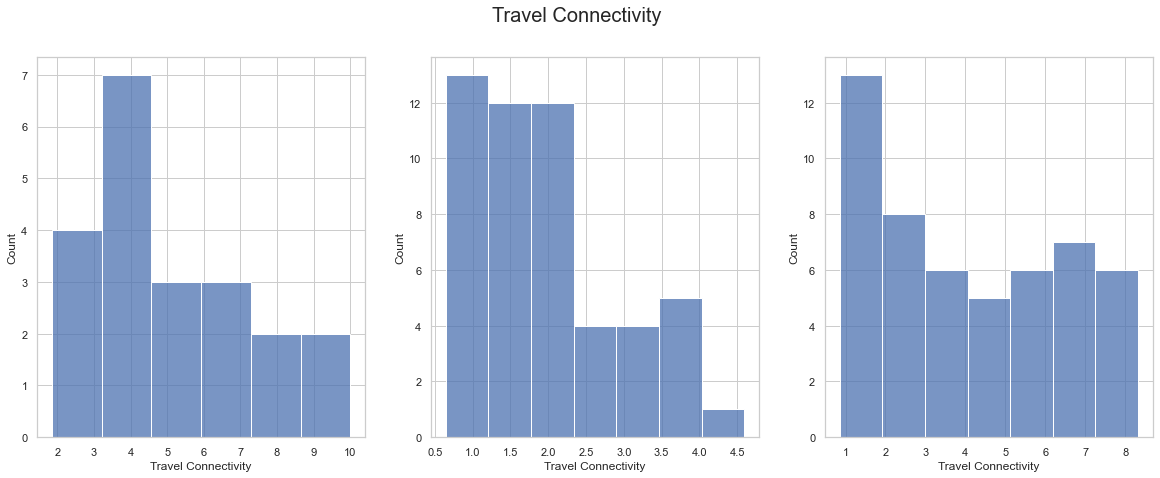

In [122]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
sns.histplot(data = subdata1, x='Travel Connectivity', ax=axs[0])
sns.histplot(data = subdata2, x='Travel Connectivity', ax=axs[1])
sns.histplot(data = subdata3, x='Travel Connectivity', ax=axs[2])
fig.suptitle('Travel Connectivity', fontsize = 20);

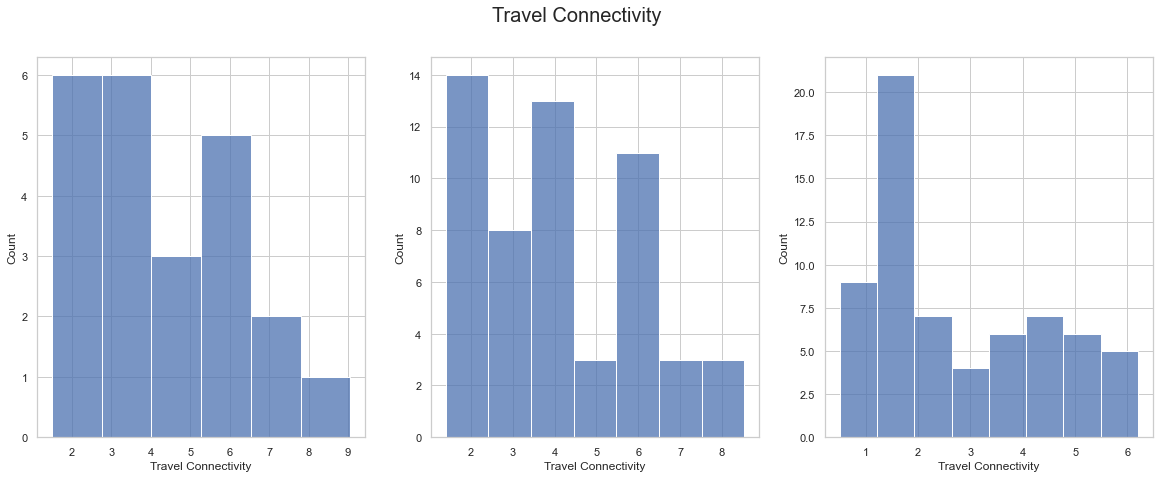

In [123]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
sns.histplot(data = subdata4, x='Travel Connectivity', ax=axs[0])
sns.histplot(data = subdata5, x='Travel Connectivity', ax=axs[1])
sns.histplot(data = subdata6, x='Travel Connectivity', ax=axs[2])
fig.suptitle('Travel Connectivity', fontsize = 20);

## Safety

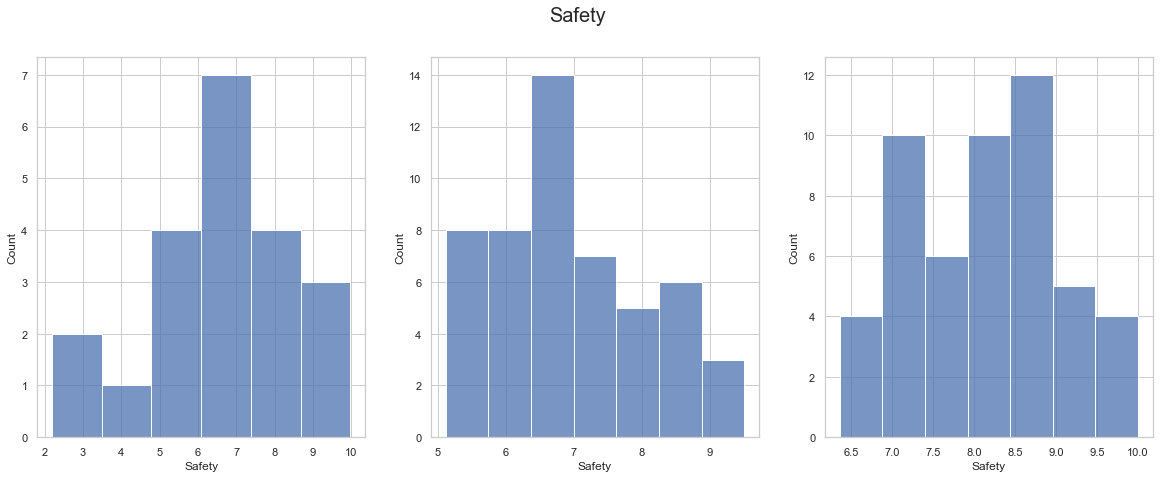

In [124]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
sns.histplot(data = subdata1, x='Safety', ax=axs[0])
sns.histplot(data = subdata2, x='Safety', ax=axs[1])
sns.histplot(data = subdata3, x='Safety', ax=axs[2])
fig.suptitle('Safety', fontsize = 20);

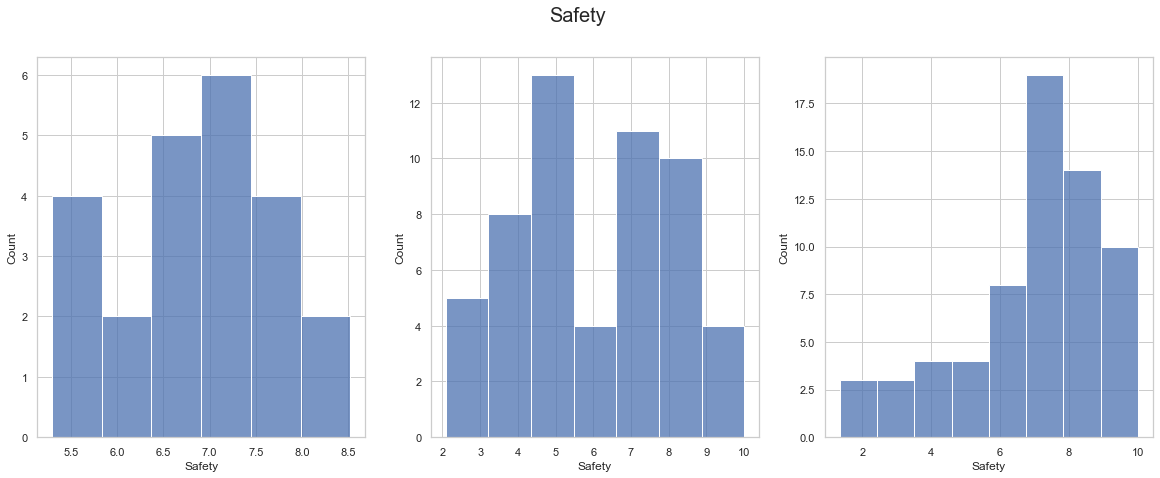

In [125]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
sns.histplot(data = subdata4, x='Safety', ax=axs[0])
sns.histplot(data = subdata5, x='Safety', ax=axs[1])
sns.histplot(data = subdata6, x='Safety', ax=axs[2])
fig.suptitle('Safety', fontsize = 20);